on vire ,
name
owner
mileage
engine
max_power
torque

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('./Car details v3.csv')

In [26]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


<Axes: >

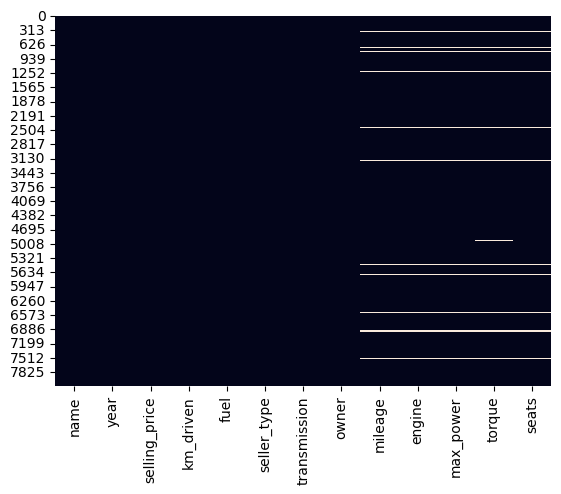

In [28]:
# Verifier les null !
import seaborn as sns
number_of_missing = df.isna()
sns.heatmap(number_of_missing, cbar=False)
#En blanc , les données null !

In [29]:
#somme des lignes null
number_of_missing.sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [30]:
# supprime toutes ces colonnes
df.drop("mileage",axis=1,inplace=True)
df.drop("engine",axis=1,inplace=True)
df.drop("max_power",axis=1,inplace=True)
df.drop("name",axis=1,inplace=True)
df.drop("owner",axis=1,inplace=True)
df.drop("torque",axis=1,inplace=True)

df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,seats
0,2014,450000,145500,Diesel,Individual,Manual,5.0
1,2014,370000,120000,Diesel,Individual,Manual,5.0
2,2006,158000,140000,Petrol,Individual,Manual,5.0
3,2010,225000,127000,Diesel,Individual,Manual,5.0
4,2007,130000,120000,Petrol,Individual,Manual,5.0


In [31]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
seats            float64
dtype: object

<Axes: >

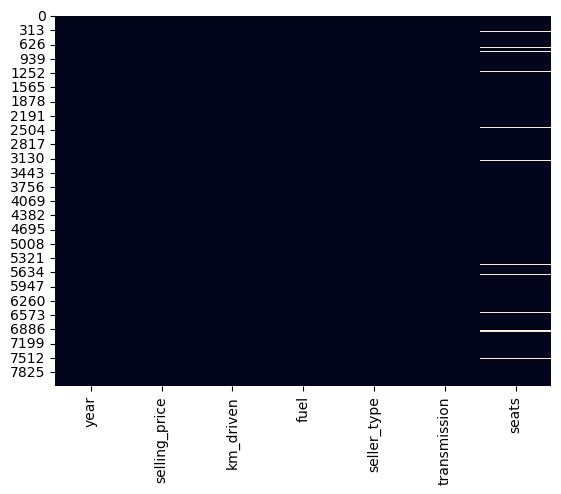

In [32]:
# Verifier les null !
import seaborn as sns
number_of_missing = df.isna()
sns.heatmap(number_of_missing, cbar=False)
#En blanc , les données null !

<Axes: xlabel='fuel', ylabel='count'>

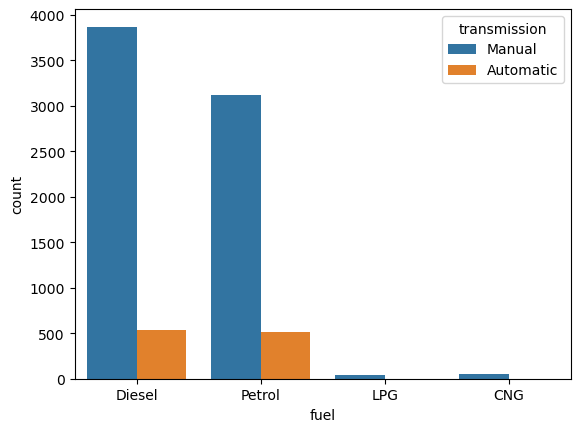

In [33]:
#sns.histplot(data=y,bins=20)
sns.countplot(data=df,x="fuel",hue="transmission")

In [34]:
df.transmission=pd.get_dummies(df.transmission,drop_first=True)


In [35]:
resonnable_car = df.loc[df.selling_price <= 85000, :]

In [36]:
resonnable_car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,seats
7,2001,45000,5000,Petrol,Individual,True,4.0
31,2003,70000,50000,Petrol,Individual,True,NaN
78,2003,50000,70000,Diesel,Individual,True,NaN
177,1999,40000,40000,Petrol,Individual,True,4.0
191,2005,85000,90000,Petrol,Individual,True,5.0


In [37]:
resonnable_car.dropna()

,year,selling_price,km_driven,fuel,seller_type,transmission,seats
7,2001,45000,5000,Petrol,Individual,True,4.0
177,1999,40000,40000,Petrol,Individual,True,4.0
191,2005,85000,90000,Petrol,Individual,True,5.0
195,2005,65000,86000,Petrol,Individual,True,5.0
242,2007,80000,120000,Petrol,Individual,True,5.0
...,...,...,...,...,...,...,...
8017,2008,60000,120000,Diesel,Individual,True,5.0
8020,2007,65000,120000,Diesel,Individual,True,5.0
8025,1998,35000,40000,Petrol,Individual,True,4.0
8089,2011,46000,25000,Petrol,Individual,True,4.0


In [38]:
resonnable_car.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission        bool
seats            float64
dtype: object

In [72]:
resonnable_car.seller_type.unique()

AttributeError: 'DataFrame' object has no attribute 'seller_type'

In [39]:
#df[['northwest','southeast','southwest']]  =pd.get_dummies(df.region , drop_first=True)
resonnable_car[['Petrol','Diesel','LPG']]=pd.get_dummies(resonnable_car.fuel,drop_first=True)

C:\Users\f.renaux\AppData\Local\Temp\ipykernel_23248\2416767575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resonnable_car[['Petrol','Diesel','LPG']]=pd.get_dummies(resonnable_car.fuel,drop_first=True)
C:\Users\f.renaux\AppData\Local\Temp\ipykernel_23248\2416767575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resonnable_car[['Petrol','Diesel','LPG']]=pd.get_dummies(resonnable_car.fuel,drop_first=True)
C:\Users\f.renaux\AppData\Local\Temp\ipykernel_23248\2416767575.py:2: SettingWithCopyWarning

!!! retenir que CNG a été supprimé de la colonne fuel 

In [40]:
resonnable_car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,seats,Petrol,Diesel,LPG
7,2001,45000,5000,Petrol,Individual,True,4.0,False,False,True
31,2003,70000,50000,Petrol,Individual,True,NaN,False,False,True
78,2003,50000,70000,Diesel,Individual,True,NaN,True,False,False
177,1999,40000,40000,Petrol,Individual,True,4.0,False,False,True
191,2005,85000,90000,Petrol,Individual,True,5.0,False,False,True


In [41]:
resonnable_car.drop("fuel",axis=1,inplace=True)


C:\Users\f.renaux\AppData\Local\Temp\ipykernel_23248\2073061376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resonnable_car.drop("fuel",axis=1,inplace=True)


In [76]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,seats
0,2014,450000,145500,Diesel,Individual,True,5.0
1,2014,370000,120000,Diesel,Individual,True,5.0
2,2006,158000,140000,Petrol,Individual,True,5.0
3,2010,225000,127000,Diesel,Individual,True,5.0
4,2007,130000,120000,Petrol,Individual,True,5.0


In [42]:
resonnable_car.head()

,year,selling_price,km_driven,seller_type,transmission,seats,Petrol,Diesel,LPG
7,2001,45000,5000,Individual,True,4.0,False,False,True
31,2003,70000,50000,Individual,True,NaN,False,False,True
78,2003,50000,70000,Individual,True,NaN,True,False,False
177,1999,40000,40000,Individual,True,4.0,False,False,True
191,2005,85000,90000,Individual,True,5.0,False,False,True


In [43]:
resonnable_car.dtypes

year               int64
selling_price      int64
km_driven          int64
seller_type       object
transmission        bool
seats            float64
Petrol              bool
Diesel              bool
LPG                 bool
dtype: object

In [44]:
resonnable_car.columns

Index(['year', 'selling_price', 'km_driven', 'seller_type', 'transmission',
       'seats', 'Petrol', 'Diesel', 'LPG'],
      dtype='object')

In [45]:
resonnable_car.head()

,year,selling_price,km_driven,seller_type,transmission,seats,Petrol,Diesel,LPG
7,2001,45000,5000,Individual,True,4.0,False,False,True
31,2003,70000,50000,Individual,True,NaN,False,False,True
78,2003,50000,70000,Individual,True,NaN,True,False,False
177,1999,40000,40000,Individual,True,4.0,False,False,True
191,2005,85000,90000,Individual,True,5.0,False,False,True


In [48]:

#resonnable_car.seller_type=pd.get_dummies(resonnable_car.seller_type,drop_first=True)
resonnable_car[['Dealer','Individual']]=pd.get_dummies(resonnable_car.seller_type)
#resonnable_car.head()

C:\Users\f.renaux\AppData\Local\Temp\ipykernel_23248\1026594619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resonnable_car[['Dealer','Individual']]=pd.get_dummies(resonnable_car.seller_type)
C:\Users\f.renaux\AppData\Local\Temp\ipykernel_23248\1026594619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resonnable_car[['Dealer','Individual']]=pd.get_dummies(resonnable_car.seller_type)


In [49]:
resonnable_car.head()

,year,selling_price,km_driven,seller_type,transmission,seats,Petrol,Diesel,LPG,Dealer,Individual
7,2001,45000,5000,Individual,True,4.0,False,False,True,False,True
31,2003,70000,50000,Individual,True,NaN,False,False,True,False,True
78,2003,50000,70000,Individual,True,NaN,True,False,False,False,True
177,1999,40000,40000,Individual,True,4.0,False,False,True,False,True
191,2005,85000,90000,Individual,True,5.0,False,False,True,False,True


In [50]:
resonnable_car.drop("seller_type",axis=1,inplace=True)

C:\Users\f.renaux\AppData\Local\Temp\ipykernel_23248\380611968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resonnable_car.drop("seller_type",axis=1,inplace=True)


In [51]:
resonnable_car=resonnable_car.dropna()

In [68]:
resonnable_car.describe(include='all')

,year,selling_price,km_driven,transmission,seats,Petrol,Diesel,LPG,Dealer,Individual
count,220.000000,220.000000,220.000000,220,220.000000,220,220,220,220,220
unique,NaN,NaN,NaN,2,NaN,2,2,2,2,2
top,NaN,NaN,NaN,True,NaN,False,False,True,False,True
freq,NaN,NaN,NaN,217,NaN,188,219,186,216,216
mean,2004.740909,62857.963636,82773.486364,NaN,4.627273,NaN,NaN,NaN,NaN,NaN
std,4.173318,14914.151132,42746.984739,NaN,0.586906,NaN,NaN,NaN,NaN,NaN
min,1994.000000,29999.000000,5000.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
25%,2002.000000,50000.000000,51773.750000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,2005.000000,65000.000000,80000.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
75%,2007.000000,75000.000000,105500.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Count'>

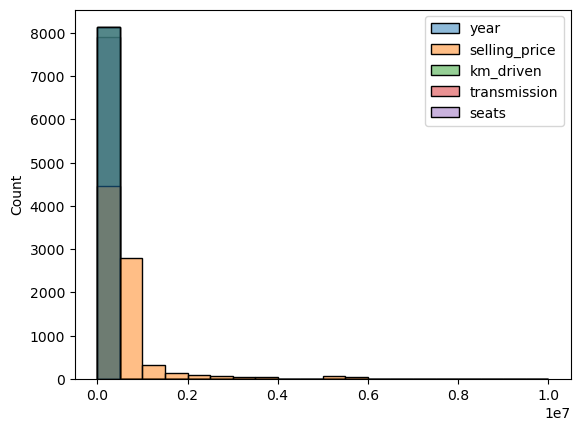

In [70]:
sns.histplot(data=df,bins=20)

In [52]:
resonnable_car.head()

,year,selling_price,km_driven,transmission,seats,Petrol,Diesel,LPG,Dealer,Individual
7,2001,45000,5000,True,4.0,False,False,True,False,True
177,1999,40000,40000,True,4.0,False,False,True,False,True
191,2005,85000,90000,True,5.0,False,False,True,False,True
195,2005,65000,86000,True,5.0,False,False,True,False,True
242,2007,80000,120000,True,5.0,False,False,True,False,True


In [53]:
resonnable_car.dtypes

year               int64
selling_price      int64
km_driven          int64
transmission        bool
seats            float64
Petrol              bool
Diesel              bool
LPG                 bool
Dealer              bool
Individual          bool
dtype: object

In [54]:
# feature et target
X =resonnable_car.drop("selling_price",axis=1)
y=resonnable_car.selling_price

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape

(176, 9)

In [57]:
y_train.shape

(176,)

In [58]:
#evaluer on train Et test set ===> deja fait l'import
from sklearn.tree import DecisionTreeRegressor
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
model.score(X_train,y_train)

0.28905300592499217

In [60]:
model.score(X_test,y_test)

0.3542360137997458

In [61]:
exam=DecisionTreeRegressor()
exam.fit(X_train,y_train)

DecisionTreeRegressor()

In [62]:
exam.score(X_train,y_train)

0.9534997011636517

In [63]:
exam.score(X_test,y_test)

-0.7725460067349392

In [64]:
# prediction
y_pred=model.predict(X_test)

In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error
r2_score(y_test,y_pred)

0.3542360137997458

In [73]:
y_pred = model.predict(X_train)

array([ 49605.12369263,  48546.0267289 ,  67521.99992875,  57636.14478972,
        80000.        ,  65230.78934086,  68482.52100297,  56058.08168484,
        50164.30692151,  66581.13796962,  55313.5564873 ,  67934.6439213 ,
        51517.8128732 ,  67434.73018645,  69582.55886093,  69317.78462   ,
        66442.43620332,  58314.97737861,  64127.59415998,  58430.46751253,
        68229.05290925,  69041.70423185,  49340.3494517 ,  61726.29739178,
        58874.16060749,  69552.92411392,  51152.26555616,  61875.5814988 ,
        56137.51395712,  51223.40388525,  53857.29816217,  53857.29816217,
        53886.10559958,  69023.37563205,  69258.51512597,  60108.01719917,
        67640.23493336,  59225.1718187 ,  52312.135596  ,  58927.11545568,
        59403.70908936,  69023.37563205,  49272.54727805,  64612.22814918,
        48516.39198189,  67669.86968037,  70529.43148245,  50885.51201787,
        66581.13796962,  79210.24565133,  55343.19123432,  68482.52100297,
        64751.03838426,  

recuperer une seule ligne

In [77]:
resonnable_car.iloc[0]

year              2001
selling_price    45000
km_driven         5000
transmission      True
seats              4.0
Petrol           False
Diesel           False
LPG               True
Dealer           False
Individual        True
Name: 7, dtype: object

In [78]:
# answer = input("etses vous individual ou dealer ?")
# "Individual"==answer
# boite = input("etses vous manuel ou automatique ?")
# "Manual"==boite

False

In [ ]:
year = int (input("Quelle année ?"))
km = int (input("Combien de km ?"))
answer = input("etses vous individual ou dealer ?")
boite = input("etses vous manuel ou automatique ?")
place = int (input("Combien de place ?"))
carburant = input("Type de carburant ?")
def preprocessing_fuel(fuel):
    arr = [False,False,False]
    if fuel == "diesel":
        arr[0]= True
    elif fuel == "LPG":
        arr[1]=True
    elif fuel == "Petrole":
        arr[2]=True
    return arr   
fuel = preprocessing_fuel(carburant)
car={
    "year":year,
    "km_driven":km,
    "Petrol":[0],#diesel,lpg,petrole,cng
    "Diesel":[1],
    "LPG":[2],
    "seller_type":"Individual"==answer,
    "transmission":"Manual"==boite,
    "seats":place,
}
def predit(car,model):
    result =pd.DataFrame(car,columns=list(car.keys()),index=[0])
    return model.predict(result)

predit(car,model)

In [79]:
from sklearn.datasets import load_iris


NameError: name 'car' is not defined